# EDA: Top 1000 Most Common Filipino Names

![Image Description](../cover.jpg)


## Introduction 

Welcome to this notebook where we will perform Exploratory Data Analysis (EDA) on a dataset containing the top 1000 most common Filipino names. The dataset provides valuable insights into the prevalence and characteristics of popular first names in the Philippines.

The purpose of this analysis is to gain a deeper understanding of the dataset and uncover meaningful patterns, trends, and distributions associated with the Filipino names. Through EDA, we will explore various aspects such as the gender distribution, popularity rankings, variations in names, name lengths, and more.

By conducting this analysis, we aim to shed light on the cultural significance of names in the Philippines, provide statistical summaries, and identify interesting observations that contribute to our knowledge of naming practices within the Filipino population.

## Dataset Overview

The dataset comprises six columns: rank, forename, incidence, frequency, gender and gender_percentage. Each row represents a unique name entry, with rank indicating the popularity rank of the name, gender denoting the gender associated with the name, forename representing the name itself, and incidence and frequency providing the respective measures of occurrence in the dataset.

## Outline of Analysis

Throughout this notebook, we will address a series of questions to gain insights into the dataset. We will perform data cleaning, visualize distributions, analyze gender ratios, examine popularity trends, explore name variations, investigate name lengths, and identify correlations between ranks, frequencies, and incidences.

By following a structured approach and utilizing visualizations, statistical measures, and exploratory techniques, we aim to unravel the intriguing aspects of the dataset and draw meaningful conclusions about the most common Filipino names.



In [1]:
import numpy as np               #for linear algebra
import pandas as pd              #for data manipulation
import matplotlib.pyplot as plt  #for visualization
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [ ]:
df = pd.read_csv('')

In [4]:
file_path = '../data/pop_names.csv'
df = pd.read_csv(file_path)

print(df.head())

   rank forename  incidence frequency  gender  gender_percentage
0     1     Mary  2,229,082      1:48  Female                 99
1     2    Maria    873,664     1:121  Female                 99
2     3     John    661,521     1:160    Male                 99
3     4     Jose    643,811     1:165    Male                 99
4     5     Mark    630,830     1:168    Male                100


### 1. What is the gender distribution in the dataset?

In [5]:
# Filter the dataset to separate names by gender
male_names = df[df['gender'] == 'Male']
female_names = df[df['gender'] == 'Female']

In [6]:
# Calculate the count of male and female names
male_count = male_names.shape[0]
female_count = female_names.shape[0]

# Calculate the percentage of male and female names
total_count = df.shape[0]
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

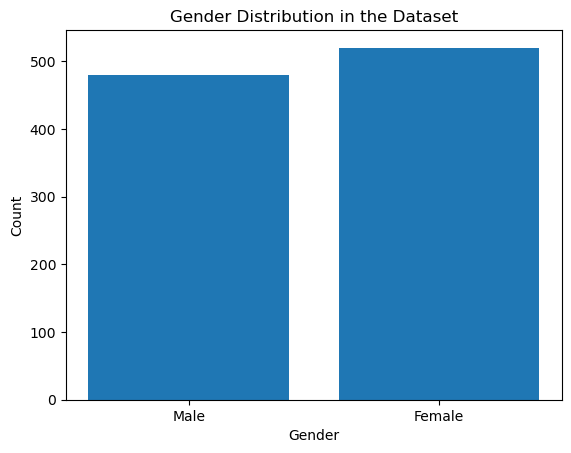

In [7]:
import matplotlib.pyplot as plt

# Create a bar chart
gender_labels = ['Male', 'Female']
gender_counts = [male_count, female_count]

plt.bar(gender_labels, gender_counts)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution in the Dataset')
plt.show()

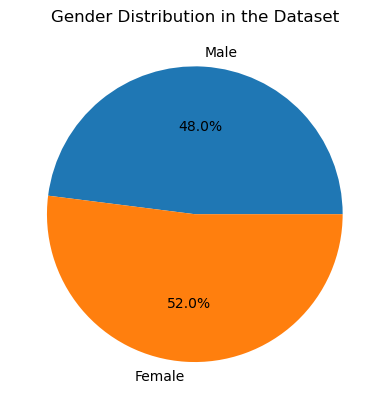

In [8]:
# Create a pie chart
gender_labels = ['Male', 'Female']
gender_counts = [male_count, female_count]

plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%')
plt.title('Gender Distribution in the Dataset')
plt.show()
